# Transit photometry

In this notebook, we shall analyse the photometric observations of the target WASP-52. Here, we shall work directly on the reduced science images (i.e., calibrated images). We mainly focus on aperture photometry here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from scipy import ndimage
from matplotlib.patches import Circle, Wedge, Polygon
import utils as utl

## Loading an image

The data is stored in another directory -- we first want to load one of the files to see how it looks like. We use `astropy.io.fits` function to do so.

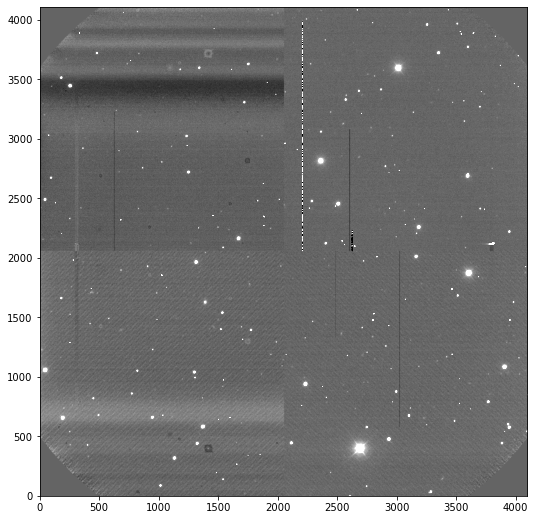

In [2]:
p1 = os.getcwd() + '/Data/'
lst = os.listdir(p1)
lst.sort(key = utl.natural_keys)
img_data = fits.getdata(p1 + lst[0])

# Plotting the data
fig, ax1 = plt.subplots(1, figsize=(9,9))
ax1.imshow(img_data, cmap='gray', vmin=0, vmax=60, origin='lower')

Nice! Our target star is the one bright star on the left middle part of the image. We now create a subimage centered on the target. By looking at above image, we can say that the coordinates of the target should be within $3500$ and $3700$ for $x-$ range and within $1775$ and $1975$ for $y-$ coordinate. We make a slice of the image for this coordinate range, and visualize it. Further, we also use `scipy.ndimage.measurements.center_of_mass` function to find the center of the star. We plot them below.

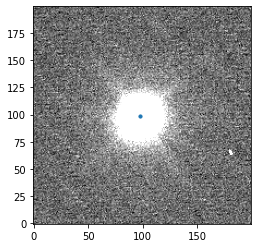

In [3]:
subimage = img_data[1775:1975, 3500:3700]
cenx, ceny = ndimage.measurements.center_of_mass(subimage)
fig, ax2 = plt.subplots(1)
ax2.imshow(subimage, cmap='gray', vmin=0, vmax=60, origin='lower')
ax2.scatter(cenx, ceny, 10)


Well, so, here is our target star. We now want to define the aperture for this target star. We define the aperture as the circular area with the center as the center of the image of our target star. The idea is to first create an array with $1s$ only on those positions where the distance of the given pixel from the center of the image would be below certain value. We define this function below, and also plot the resultant aperture for our target. For now, we take the radius of aperture $20$ pixels.

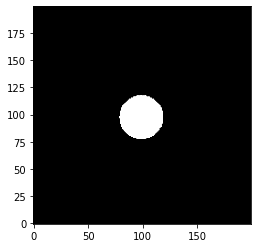

In [4]:
def aperture(image, cen1, cen2, rad=20, mask=False):
    """
    To define the aperture
    ----------------------
    Parameters:
    -----------
    image : numpy.ndarray
        given image of the target
    cen1, cen2 : float
        x and y position of the center of the target
    rad : float, int
        distance from the center which would be included
        in the aperture
        default is 20
    mask : bool
        if True, return the mask as well
        mask is an array of 0 and 1,
        1 where, there should be light
    -----------
    return
    -----------
    numpy.ndarray :
        array of the same size as image
        return the aperture
    """
    mask1 = np.zeros(image.shape)
    for i in range(len(image[:,0])):
        for j in range(len(image[0,:])):
            dist = np.sqrt((i-cen1)**2 + (j-cen2)**2)
            if dist <= rad:
                mask1[i][j] = 1
    aper = mask1*image
    if mask:
        return aper, mask1
    else:
        return aper

aper0 = aperture(image=subimage, cen1=cenx, cen2=ceny, rad=20)
plt.imshow(aper0, cmap='gray', vmin=0, vmax=60, origin='lower')

Now, we want to define the same aperture for the sky background. The usual procedure is to define an annulus around the center of the star. We can take any arbitrary value for the inner and outer radii of the aperture. For now, we shall be taking 40 and 50 pixels as inner and outer radii of the anuulus.

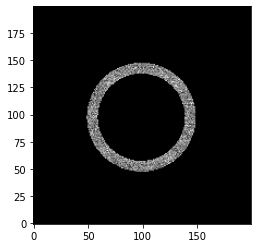

In [5]:
def sky_back(image, cen1, cen2, inner_rad=40, outer_rad=50, mask=False):
    """
    To create annulus shaped aperture
    ---------------------------------
    Parameters:
    -----------
    image : numpy.ndarray
        given image of the target
    cen1, cen2 : float
        x and y position of the center of the target
    inner_rad, outer_rad : float, int
        inner and outer radii of the annulus
    -----------
    return
    -----------
    numpy.ndarray :
        an array of the annulus aperture
    """
    mask2 = np.zeros(image.shape)
    for i in range(len(image[:,0])):
        for j in range(len(image[0,:])):
            dist = np.sqrt((i-cen1)**2 + (j-cen2)**2)
            if dist <= outer_rad and dist >= inner_rad:
                mask2[i][j] = 1
    sky3 = mask2*image
    if mask:
        return sky3, mask2
    else:
        return sky3

sky2 = sky_back(image=subimage, cen1=cenx, cen2=ceny)
plt.imshow(sky2, cmap='gray', vmin=0, vmax=60, origin='lower')

We can now plot the various region we have been discussing -- first region is the region of the aperture. That is the circular region with certain radius; and an sky aperture, which is an annulus with certain inner and outer radii. We, below, plot this regions in red and in green respectively.

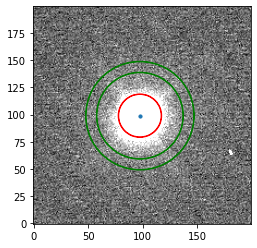

In [6]:
rad = 20
skyrad1 = 40
skyrad2 = 50

fig, ax3 = plt.subplots(1)
ax3.imshow(subimage, cmap='gray', vmin=0, vmax=60, origin='lower')
ax3.scatter(cenx, ceny, 10)
Aperture = Wedge((cenx, ceny), rad, 0, 360, width=0.5, color='red')
ax3.add_patch(Aperture)
Skuannulus1 = Wedge((cenx, ceny), skyrad1, 0, 360, width=0.5, color='green')
Skuannulus2 = Wedge((cenx, ceny), skyrad2, 0, 360, width=0.5, color='green')
ax3.add_patch(Skuannulus1)
ax3.add_patch(Skuannulus2)

Well, it is obvious that the aperture radius of 20 pixels is not enough, or not even good. Similarly, we also want to increase the radii of annulus. Let's set the radii of target aperture to 35 and radii of annulus to be 70 and 80 for inner and outer radii. Let's plot them.

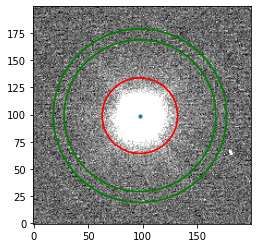

In [7]:
rad = 35
skyrad1 = 70
skyrad2 = 80

fig, ax3 = plt.subplots(1)
ax3.imshow(subimage, cmap='gray', vmin=0, vmax=60, origin='lower')
ax3.scatter(cenx, ceny, 10)
Aperture = Wedge((cenx, ceny), rad, 0, 360, width=0.5, color='red')
ax3.add_patch(Aperture)
Skuannulus1 = Wedge((cenx, ceny), skyrad1, 0, 360, width=0.5, color='green')
Skuannulus2 = Wedge((cenx, ceny), skyrad2, 0, 360, width=0.5, color='green')
ax3.add_patch(Skuannulus1)
ax3.add_patch(Skuannulus2)

Well, it is looking good now.

We now write a function that can extract the total flux from the aperture. In doing so, we just sum up the total counts in the aperture. However, keep in mind that, we want to subtract the sky background from this flux. Hence, we first compute a sky background as an average flux per pixel in the sky backgound aperture. Then we shall use this flux in measuring the total flux from the target aperture.

In [8]:
def sky(image, cenx1, ceny1, skyrado, skyradi):
    sky4, mask4 = sky_back(image=image, cen1=cenx1, cen2=ceny1, inner_rad=skyradi, outer_rad=skyrado, mask=True)
    sky_flx = np.average(sky4)/np.sum(mask4)
    return sky_flx

def aperture_fl(image, cenx1, ceny1, rad, skyflux):
    flx1, mask8 = aperture(image=image, cen1=cenx1, cen2=ceny1, rad=rad, mask=True)
    flx = flx1 - (mask8*skyflux)
    ape_flx = np.sum(flx)
    return ape_flx

You may have note that the way of defining the ceter of the star is not perfect. We can improve this procedure by using the following formulae to compute the center of the image,

$$cx = \frac{\sum_{x=0}^{n_x} (x\sum_{y=0}^{n_y} F_{x,y})}{\sum_{x=0}^{n_x}\sum_{y=0}^{n_y} F_{x,y}}$$

and

$$cy = \frac{\sum_{y=0}^{n_y} (y\sum_{x=0}^{n_x} F_{x,y})}{\sum_{x=0}^{n_x}\sum_{y=0}^{n_y} F_{x,y}}$$

We implement these formulae in the following function:

In [9]:
def find_center(image, cen1, cen2, rad):
    """
    To find the center of the star
    ------------------------------
    Parameters:
    -----------
    image : numpy.ndarray
        image data
    cen1, cen2 : float
        initial center of the image
    rad : float
        radius of the aperture
    -----------
    return
    -----------
    float, float :
        x and y coordinates of the center
    """
    img1 = aperture(image, cen1, cen2, rad)
    cx1 = 0
    cy1 = 0
    for i in range(len(image[:,0])):
        c1 = 0
        c9 = 0
        for j in range(len(image[0,:])):
            # for cy
            c2 = i*img1[i,j]
            c1 = c1 + c2
            # for cx
            c8 = i*img1[j,i]
            c9 = c9 + c8
        cx1 = cx1 + c1
        cy1 = cy1 + c9
    cx = cx1/np.sum(img1)
    cy = cy1/np.sum(img1)
    return cy, cx

cx_n, cy_n = find_center(subimage, cenx, ceny, 20)

We now define what is called the 'Growth function' -- that is, we measure the flux by considering different radius of target aperture at each time. We can see that, by increasing the radius of the aperture, the total flux within the aperture would increase as well --- however, after some point, this increament would not be much, and we can take that radius as the radius of the target aperture.

In figure below, we plot the flux at various radii of the target aperture. We also plot our two guesses of the radii of the central aperute. We can see that the radius of $35$ pixels is much better choice than the $20$ pixels radius.

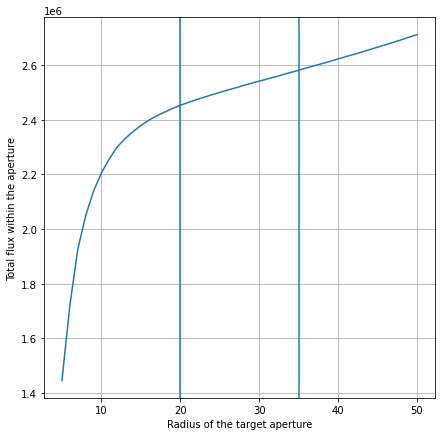

In [10]:
rads = np.arange(5,51,1)

skyflx = sky(image=subimage, cenx1=cx_n, ceny1=cy_n, skyrado=80, skyradi=70)

apr_rad = np.zeros(len(rads))

for i in range(len(rads)):
    apr_fl = aperture_fl(image=subimage, cenx1=cx_n, ceny1=cy_n, rad=rads[i], skyflux=skyflx)
    apr_rad[i] = apr_fl

plt.figure(figsize=(7,7))
plt.plot(rads, apr_rad, label='Growth function')
plt.axvline(x=20, label='Radius of 20 pixels')
plt.axvline(x=35, label='Radius of 35 pixels')
plt.xlabel('Radius of the target aperture')
plt.ylabel('Total flux within the aperture')
plt.grid()

It can be seen that, at the radius of $20$ pixels, the flux is still rising, however, at $35$ pixel radius, it is not changing that fast. So, in that sense as well the choice of $35$ pixel radius is better one.

We now try to extract the flux in the aperture for all of the files. Below we write a code for that. Note that we propagate the errors properly. In the measurements of flux, the main error would be the photon noise, which we have included in the measurement of the flux.

In [11]:
times = np.zeros(len(lst))
flx = np.zeros(len(lst))
flx_err = np.zeros(len(lst))

for i in range(len(lst)):
    img_data1 = fits.getdata(p1 + lst[i])
    subimg1 = img_data1[1775:1975, 3500:3700]
    cx2, cy2 = find_center(image=subimg1, cen1=cenx, cen2=ceny, rad=35)
    skyflx2 = sky(image=subimg1, cenx1=cx2, ceny1=cy2, skyrado=80, skyradi=70)
    apr_fl2 = aperture_fl(image=subimg1, cenx1=cx2, ceny1=cy2, rad=35, skyflux=skyflx2)
    flx[i] = apr_fl2
    flx_err[i] = np.sqrt(apr_fl2)
    hdul = fits.open(p1 + lst[i])
    times[i] = hdul[0].header['MJD-OBS']

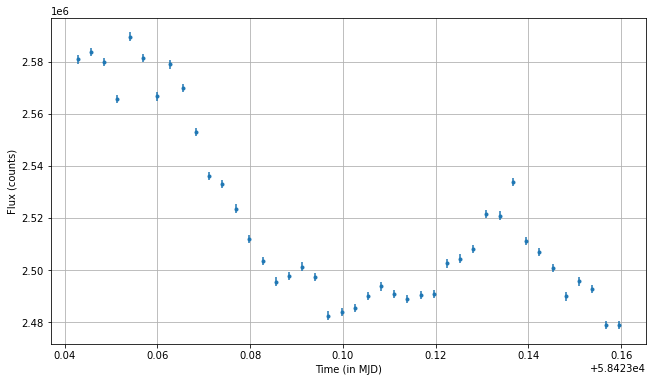

In [12]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, flx, yerr=flx_err, fmt='.')
plt.xlabel('Time (in MJD)')
plt.ylabel('Flux (counts)')
plt.grid()

Well, we can already see the dip in the flux. However there is long term trend due to the atmospheric effects. We can coorect for it using the reference star. Below, we extract the photometry using the same procedure for a reference star. And we plot them on a single plot.

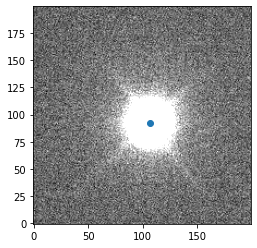

In [13]:
subimg22 = img_data[3500:3700, 2900:3100]
cenx2, ceny2 = ndimage.measurements.center_of_mass(subimg22)
cenx4, ceny4 = find_center(image=subimg22, cen1=cenx2, cen2=ceny2, rad=35)
fig, ax4 = plt.subplots(1)
ax4.imshow(subimg22, cmap='gray', vmin=0, vmax=60, origin='lower')
ax4.scatter(cenx4, ceny4)

In [14]:
times_ref = np.zeros(len(lst))
flx_ref = np.zeros(len(lst))
flx_err_ref = np.zeros(len(lst))

for i in range(len(lst)):
    img_data1 = fits.getdata(p1 + lst[i])
    subimg1 = img_data1[3500:3700, 2900:3100]
    cx2, cy2 = find_center(image=subimg1, cen1=cenx2, cen2=ceny2, rad=35)
    skyflx2 = sky(image=subimg1, cenx1=cx2, ceny1=cy2, skyrado=80, skyradi=70)
    apr_fl2 = aperture_fl(image=subimg1, cenx1=cx2, ceny1=cy2, rad=35, skyflux=skyflx2)
    flx_ref[i] =apr_fl2
    flx_err_ref[i] = np.sqrt(apr_fl2)
    hdul = fits.open(p1 + lst[i])
    times_ref[i] = hdul[0].header['MJD-OBS']

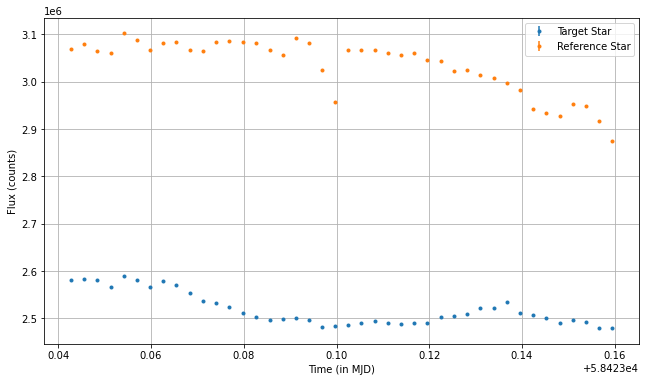

In [15]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, flx, yerr=flx_err, fmt='.', label='Target Star')
plt.errorbar(times_ref, flx_ref, yerr=flx_err_ref, fmt='.', label='Reference Star')
plt.xlabel('Time (in MJD)')
plt.ylabel('Flux (counts)')
plt.grid()
plt.legend(loc='best')

To detrend the effect of the atmosphere from the target star flux, we divide the target star flux by the flux of the reference star. We propagate the errors using the Monte-Carlo methods.

In [16]:
rel_pho, rel_pho_err = np.zeros(len(lst)), np.zeros(len(lst))

for i in range(len(lst)):
    flx_tar = np.random.normal(flx[i], flx_err[i], 10000)
    flx_re = np.random.normal(flx_ref[i], flx_err_ref[i], 10000)
    flx_rel = flx_tar/flx_re
    rel_pho[i], rel_pho_err[i] = np.mean(flx_rel), np.std(flx_rel)

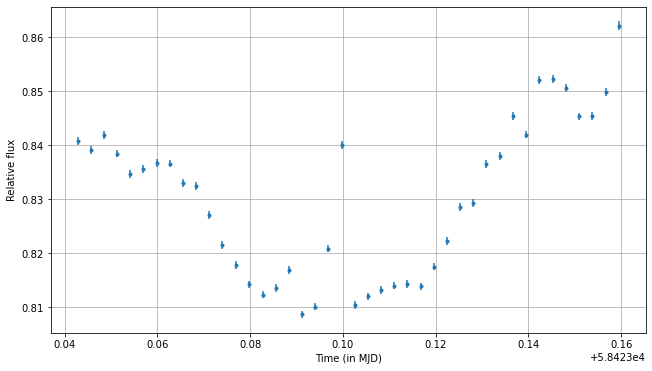

In [17]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(times, rel_pho, yerr=rel_pho_err, fmt='.')
plt.xlabel('Time (in MJD)')
plt.ylabel('Relative flux')
plt.grid()

Now, we want to normalize this lightcurve such as the out-of-the-transit flux should be 1.